In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

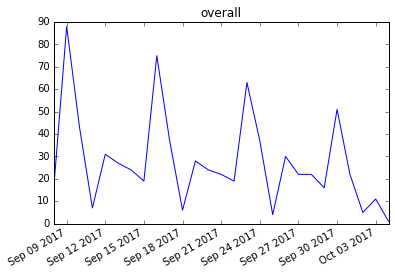

In [3]:
def frequency_by_day(dates):
    dates = list(dates)
    unique_dates = set(dates)
    counts = []
    for date in unique_dates:
        counts.append(dates.count(date))
    return unique_dates, counts


def get_categories(categories):
    full_categories = []
    for category in categories:
        full_categories += [elem.strip() for elem in category.split(",")]
    return list(set(full_categories))


def create_segmented_df(df, category):
    tmp_df = pd.DataFrame()
    for index in df.index:
        if category in df.ix[index]["categories"]:
            tmp_df = tmp_df.append(df.ix[index])
    return tmp_df


def segment_timeseries_by_categories(df, categories):
    segmentation = {}.fromkeys(categories)
    for category in categories:
        segmentation[category] = create_segmented_df(df, category)
    return segmentation

def plot_data(df, title):
    df["dates"] = pd.to_datetime(df["dates"])
    unique_dates, counts = frequency_by_day(df["dates"])
    date_freq = pd.Series(counts, index=unique_dates)
    date_freq.plot(title=title)
    plt.show()

df = pd.read_csv("parks_events_data_updated.csv", index_col = False)
plot_data(df, "overall")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


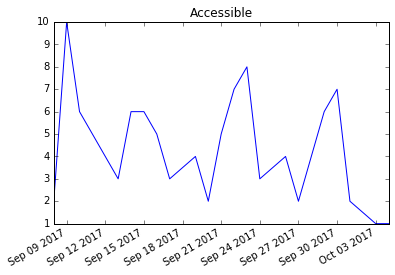

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736601.0, right=736601.0
  'left=%s, right=%s') % (left, right))


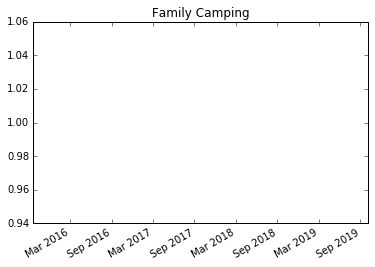

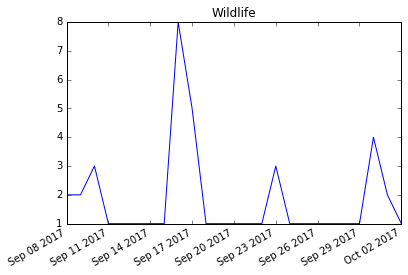

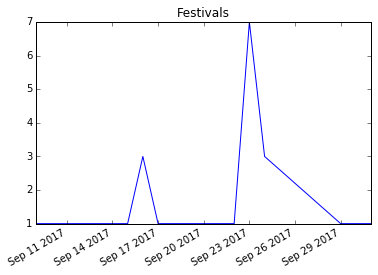

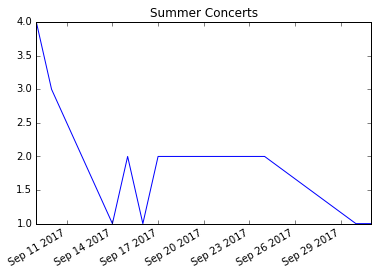

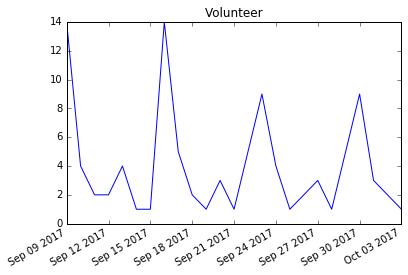

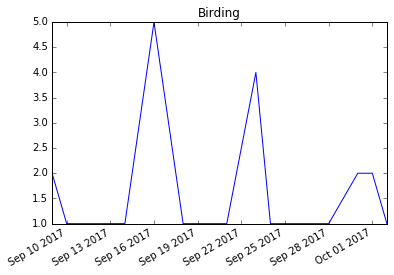

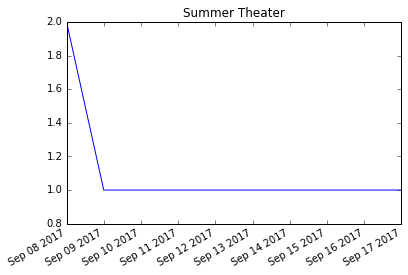

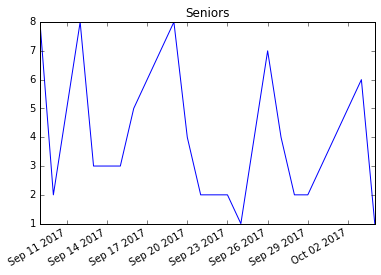

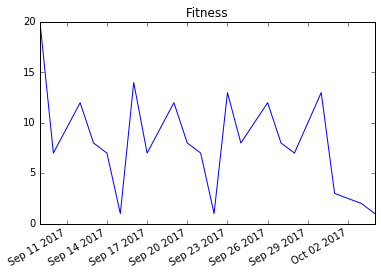

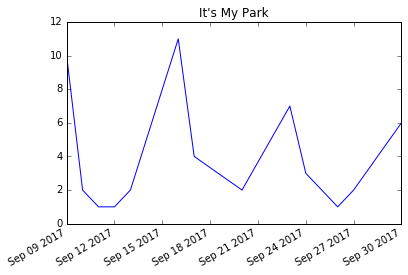

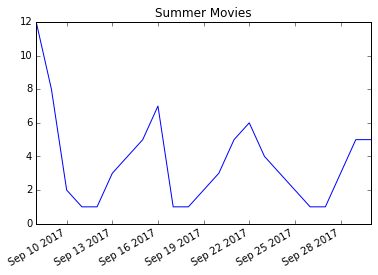

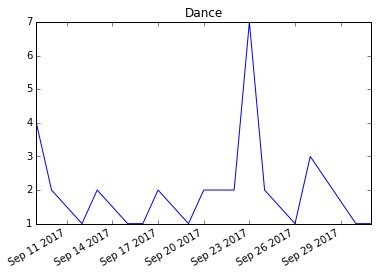

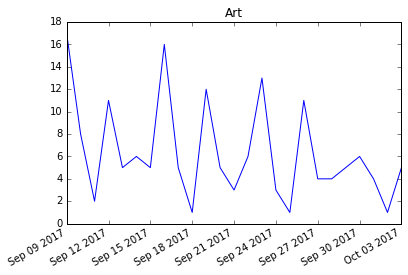

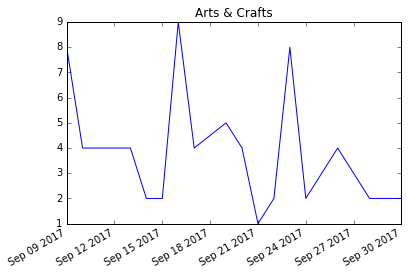

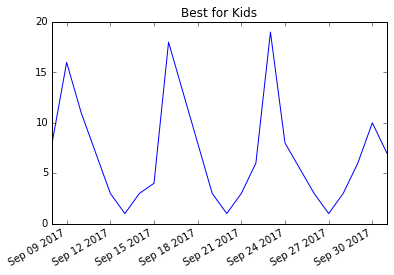

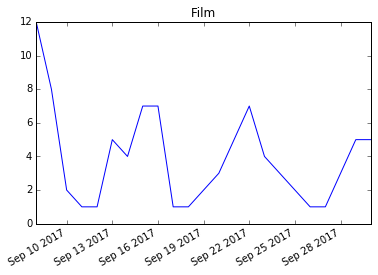

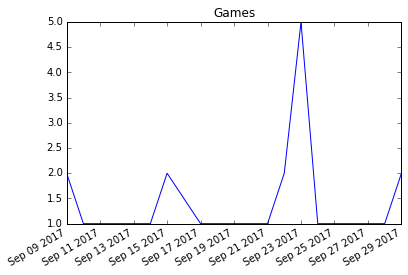

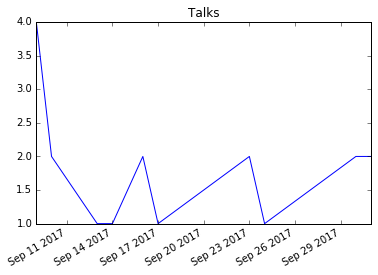

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736581.0, right=736581.0
  'left=%s, right=%s') % (left, right))


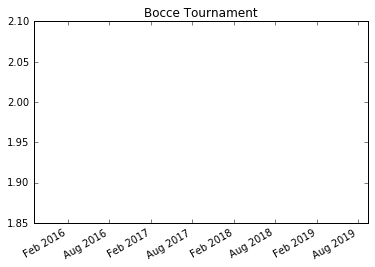

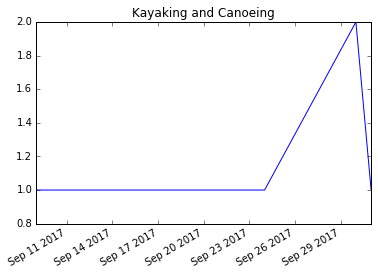

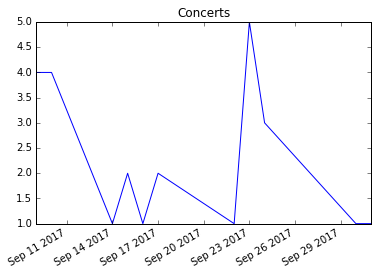

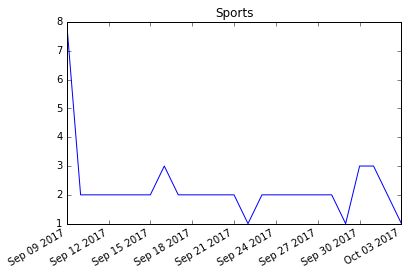

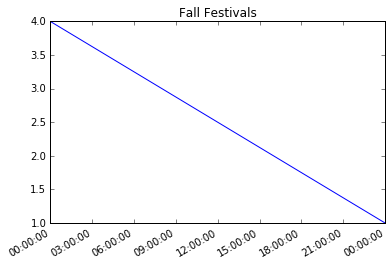

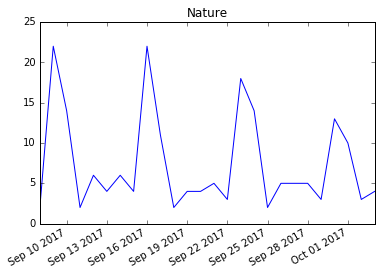

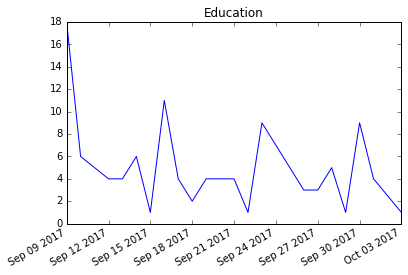

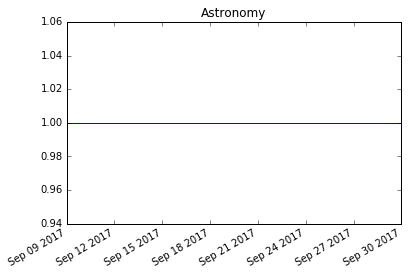

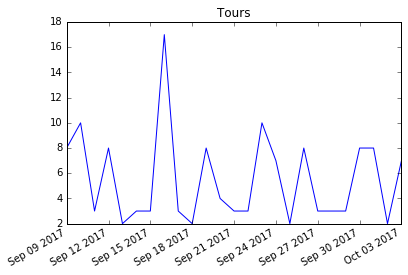

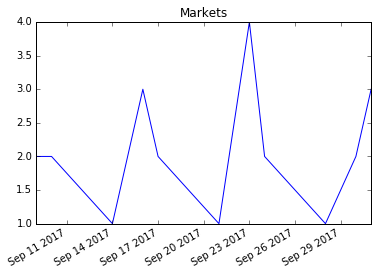

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736602.0, right=736602.0
  'left=%s, right=%s') % (left, right))


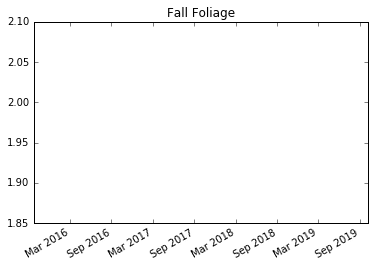

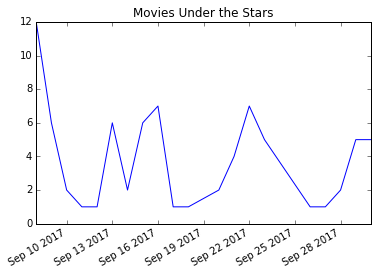

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736600.0, right=736600.0
  'left=%s, right=%s') % (left, right))


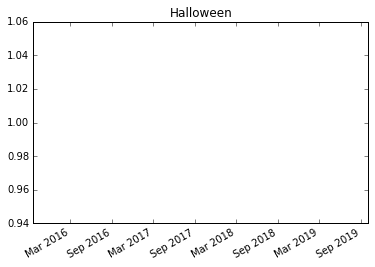

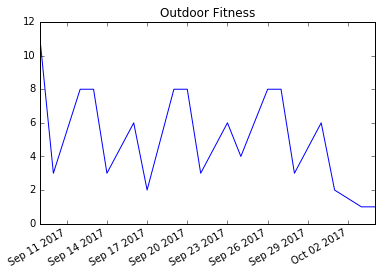

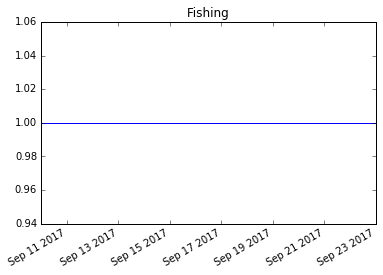

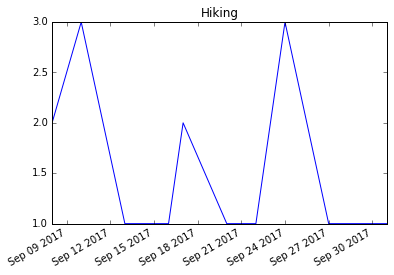

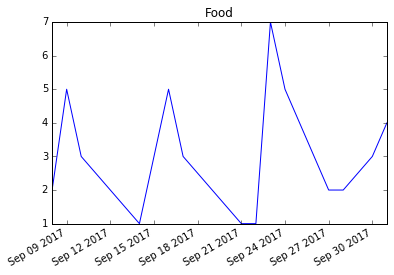

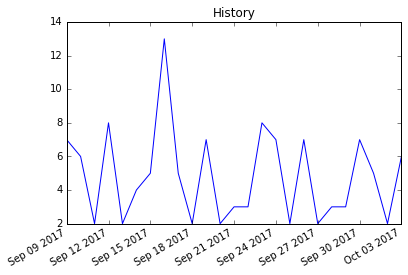

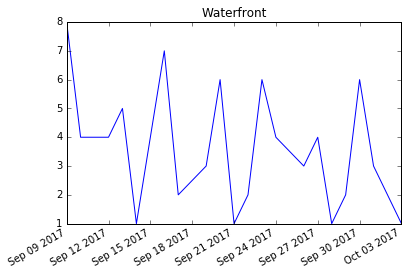

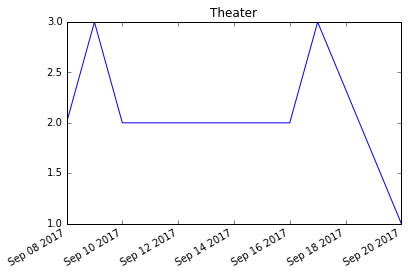

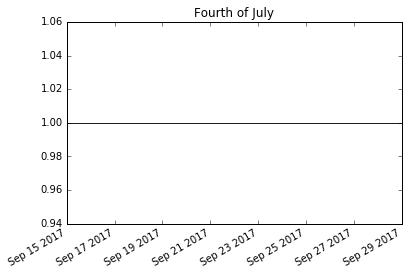

In [4]:
categories = get_categories(df["categories"])
segmentation = segment_timeseries_by_categories(df, categories)
for key in list(segmentation.keys()):
    plot_data(segmentation[key], key)
